# Map Renewable Energy Production ES

This script visualizes the renewable energy production ecosystem services for the Global GEP project

In [10]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [5]:
# set dirs
data_dir = '../data'
results_dir = os.path.join(data_dir, 'results')
out_dir = os.path.join(data_dir, 'visualizations')

In [4]:
gdf_path = os.path.join(data_dir, 'country_shapes.geojson')
gdf = gpd.read_file(gdf_path)
gdf.head()

,geo_point_2d,cntry_name,join_name,iso2_2,iso_a2,iso2,cou_iso3_code,iso3,geometry
0,"{ ""lon"": -170.70783322700001, ""lat"": -14.30440...",American Samoa,American Samoa,AS,None,AS,ASM,ASM,"POLYGON ((-170.7439 -14.37556, -170.74942 -14...."
1,"{ ""lon"": 90.429434110700001, ""lat"": 27.4154148...",Bhutan,Bhutan,None,BT,BT,BTN,BTN,"POLYGON ((92.08151 26.86905, 92.06443 26.85972..."
2,"{ ""lon"": 15.224293873400001, ""lat"": -0.8402318...",Congo,Congo,None,CG,CG,COG,COG,"POLYGON ((15.8905 -3.94301, 15.88028 -3.95111,..."
3,"{ ""lon"": -73.073214922199995, ""lat"": 3.9007491...",Colombia,Colombia,None,CO,CO,COL,COL,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."
4,"{ ""lon"": 20.482826114600002, ""lat"": 6.57134077...",Central African Republic,Central African Rep.,None,CF,CF,CAF,CAF,"POLYGON ((20.4533 4.52379, 20.45798 4.61931, 2..."


In [12]:
df_path = os.path.join(results_dir, 'solar_energy_gep_2019.csv')
df = pd.read_csv(df_path)
df.head()

,Resource,Country_Name,Year,Country_Code,P_electricity_USD_per_GWh,energy_prod_GWh,nat_contrib,gep
0,Solar energy,Angola,2019,AGO,37000.0,1.939,0.619063,4.441347e+04
1,Solar energy,Albania,2019,ALB,94000.0,22.196,0.502474,1.048373e+06
2,Solar energy,Argentina,2019,ARG,108000.0,800.947,0.368168,3.184741e+07
3,Solar energy,Armenia,2019,ARM,77000.0,23.600,0.133537,2.426642e+05
4,Solar energy,Australia,2019,AUS,204000.0,14848.000,0.149436,4.526394e+08


In [13]:
title_l = df['Resource'].to_list()
title = title_l[0]
print(title)

Solar energy


In [ ]:
def plot_iso3_choropleth(
    csv_path: str,
    spatial_path: str,
    iso_col: str = 'Country_Code',
    value_col: str = 'gep',
    geo_iso_col: str = 'iso3',
    year: int = None,
    year_col: str = 'Year',
    output_path: str = None,
    figsize: tuple = (12, 8)
):
    # Load CSV and ISO codes
    df = pd.read_csv(csv_path)
    df[iso_col] = df[iso_col].str.upper()

    # Filter by year if requested
    if year is not None:
        df = df[df[year_col] == year]
        if df.empty:
            print(f"Warning: no data found for {year_col} = {year}")

    # Load boundaries and ISO codes
    world = gpd.read_file(spatial_path)
    world[geo_iso_col] = world[geo_iso_col].str.upper()

    # Merge and plot
    merged = world.merge(
        df,
        left_on=geo_iso_col,
        right_on=iso_col,
        how='left'
    )

    fig, ax = plt.subplots(figsize=figsize)
    merged.plot(
        column=value_col,
        cmap = 'winter',
        ax=ax,
        legend=True,
        missing_kwds={'color': 'lightgrey', 'label': 'No data'}
    )
    
    # set title
    resource_l = df['Resource'].to_list()
    resource = resource_l[0]
    title = f'{resource} GEP'
    if year is not None:
        title += f" ({year})"
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=150)
    plt.show()

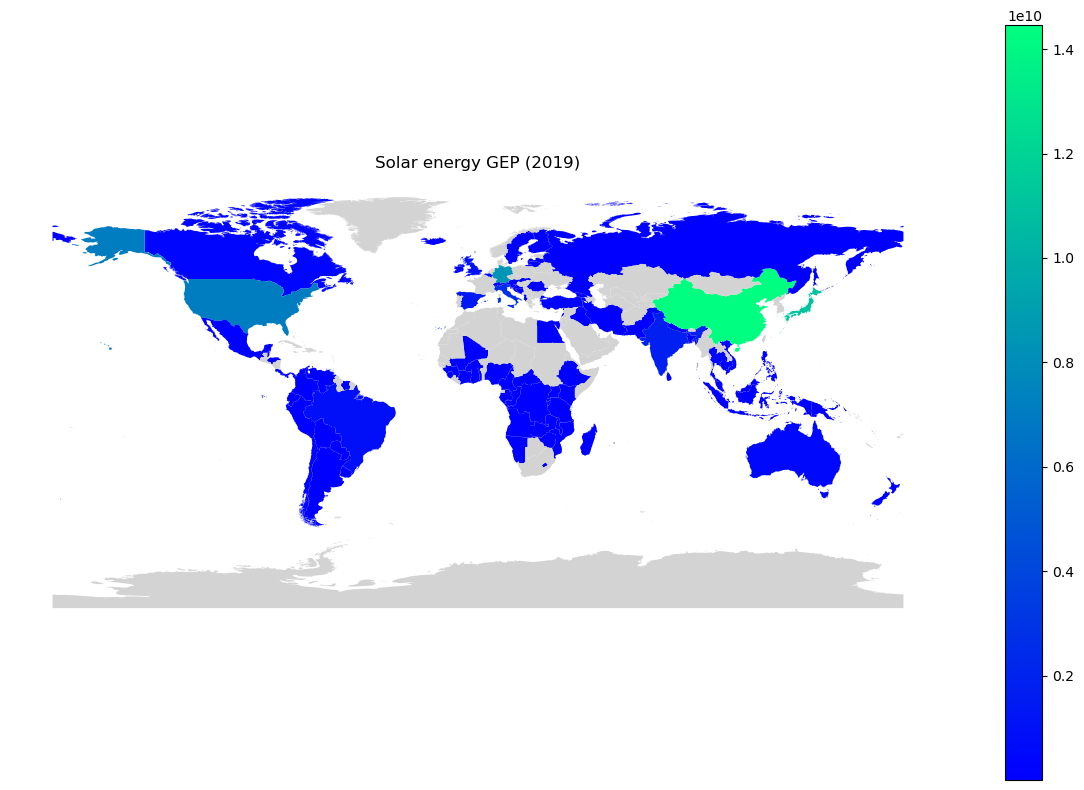

In [37]:
# call function for solar
plot_iso3_choropleth(
    csv_path = os.path.join(results_dir, 'solar_energy_gep_2019.csv'),
    spatial_path = gdf_path,
    iso_col = 'Country_Code',
    value_col = 'gep',
    year = 2019,
    output_path = os.path.join(out_dir, 'solar_gep_2019_map.png')
)

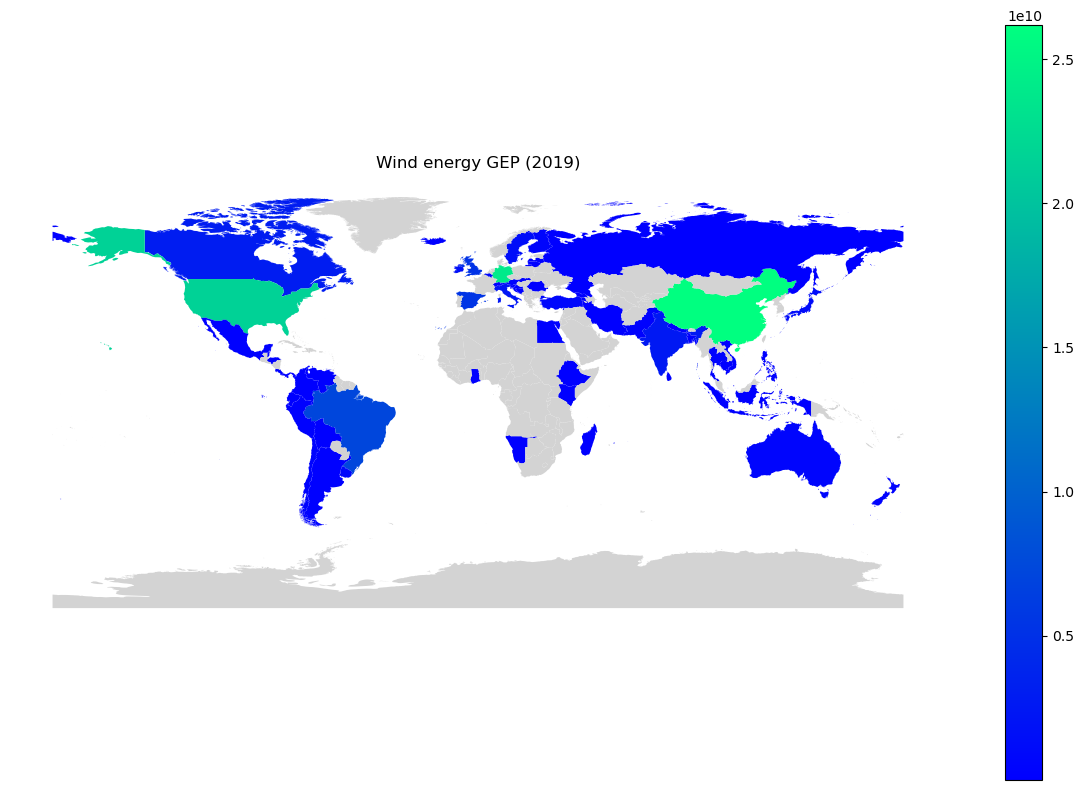

In [38]:
# call function for wind
plot_iso3_choropleth(
    csv_path = os.path.join(results_dir, 'wind_energy_gep_2019.csv'),
    spatial_path = gdf_path,
    iso_col = 'Country_Code',
    value_col = 'gep',
    year = 2019,
    output_path = os.path.join(out_dir, 'wind_gep_2019_map.png')
)

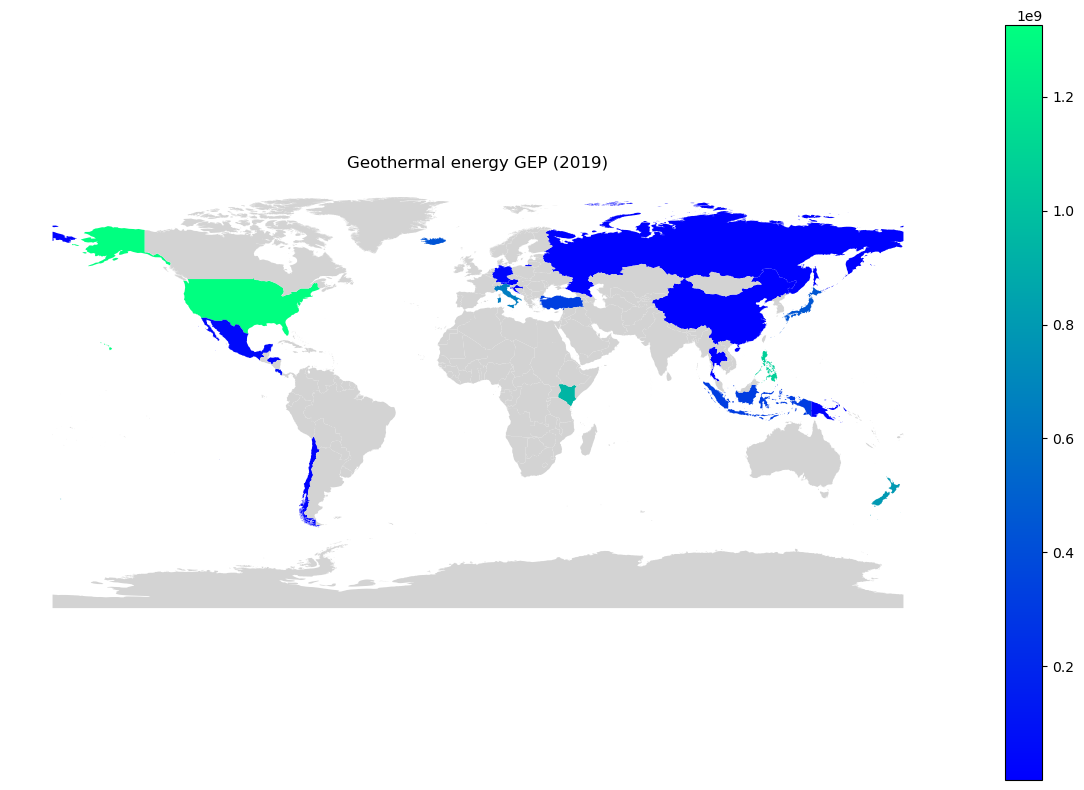

In [39]:
# call function for geothermal
plot_iso3_choropleth(
    csv_path = os.path.join(results_dir, 'geothermal_energy_gep_2019.csv'),
    spatial_path = gdf_path,
    iso_col = 'Country_Code',
    value_col = 'gep',
    year = 2019,
    output_path = os.path.join(out_dir, 'geothermal_gep_2019_map.png')
)